# Discussion Related With Outliers And Impact On Machine Learning!!
Which Machine LEarning Models Are Sensitive To Outliers?

Naivye Bayes Classifier--- Not Sensitive To Outliers

SVM-------- Not Sensitive To Outliers

Linear Regression---------- Sensitive To Outliers

Logistic Regression------- Sensitive To Outliers

Decision Tree Regressor or Classifier---- Not Sensitive

Ensemble(RF,XGboost,GB)------- Not Sensitive

KNN--------------------------- Not Sensitive

Kmeans------------------------ Sensitive

Hierarichal------------------- Sensitive

PCA-------------------------- Sensitive

Neural Networks-------------- Sensitive

# Z score

# Using Z score

Formula for Z score = (Observation — Mean)/Standard Deviation

Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation


z = (X — μ) / σ



In [319]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
result= { 'std' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
'Score' : [29,10,45,46,68,34,65,89,400,92,96,77,66,69,65,80,77,21,37,42]
        }
df =pd.DataFrame(result)
df

,std,Score
0,1,29
1,2,10
2,3,45
3,4,46
4,5,68
5,6,34
6,7,65
7,8,89
8,9,400
9,10,92


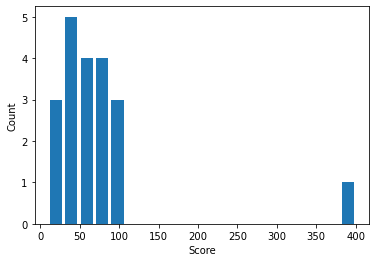

In [329]:
plt.hist(df.Score, bins=20, rwidth=0.8)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [330]:
df['zscore'] = ( df.Score - df.Score.mean() ) / df.Score.std()
df.head(20)

,std,Score,zscore
0,1,29,-0.578672
1,2,10,-0.815628
2,3,45,-0.379130
3,4,46,-0.366658
4,5,68,-0.092288
5,6,34,-0.516315
6,7,65,-0.129702
7,8,89,0.169611
8,9,400,4.048209
9,10,92,0.207025


In [331]:
df[df['zscore']>3]


,std,Score,zscore
8,9,400,4.048209


# Outlier detection and removal using 3 standard deviation
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [332]:
upper_limit = df.Score.mean() + 3*df.Score.std()
upper_limit

315.9508152903293

In [333]:
lower_limit = df.Score.mean() -3*df.Score.std()
lower_limit

-165.1508152903293

In [334]:
df[(df.Score>upper_limit) | (df.Score<lower_limit)]


,std,Score,zscore
8,9,400,4.048209


# InterQuantile Range¶

The interquartile range is a measure of where the “middle fifty” is in a data set. Where a range is a measure of where the beginning and end are in a set, an interquartile range is a measure of where the bulk of the values lie.

# 75%- 25% values in a dataset



In [335]:
## Perform all the steps of IQR
sorted(df['Score'])

[10,
 21,
 29,
 34,
 37,
 42,
 45,
 46,
 65,
 65,
 66,
 68,
 69,
 77,
 77,
 80,
 89,
 92,
 96,
 400]

In [336]:
quantile1, quantile3= np.percentile(df['Score'],[25,75])


In [337]:
print(quantile1,quantile3)


40.75 77.75


In [338]:
## Find the IQR

iqr=quantile3-quantile1
print(iqr)

37.0


In [339]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr) 
upper_bound_val = quantile3 +(1.5 * iqr)

In [340]:
print(lower_bound_val,upper_bound_val)


-14.75 133.25


In [341]:
df[(df.Score<lower_bound_val)|(df.Score>upper_bound_val)]


,std,Score,zscore
8,9,400,4.048209


In [342]:
#remove
#df_no_outlier = df[(df.height>lower_limit)&(df.height<upper_limit)]
#df_no_outlier

# On real Dataset

In [343]:
dataset = pd.read_csv('House_Data.csv')

In [344]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [345]:
dataset.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


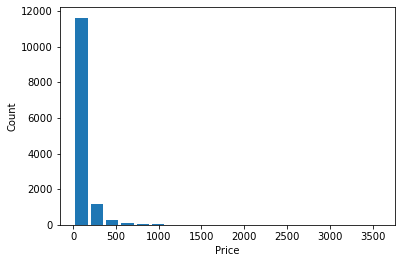

In [346]:
plt.hist(dataset.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


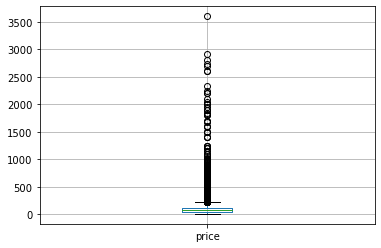

In [347]:

figure=dataset.boxplot(column="price")


# Remove data tha above 99.90% percentile and below 1% percentile rank



In [348]:
min_thresold, max_thresold = dataset.price.quantile([0.001, 0.999])
min_thresold, max_thresold

(11.159500000000001, 2000.0)

In [349]:
dataset[dataset.price < min_thresold]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
171,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
942,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
1471,Built-up Area,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
4113,Super built-up Area,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
5410,Super built-up Area,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
7482,Super built-up Area,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
8594,Built-up Area,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
8653,Plot Area,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00


In [350]:
dataset[dataset.price > max_thresold]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
605,Super built-up Area,19-Jan,Malleshwaram,7 BHK,NaN,12000,7.0,3.0,2200.0
2623,Plot Area,18-Jul,Dodsworth Layout,4 Bedroom,NaN,30000,4.0,NaN,2100.0
3180,Super built-up Area,Ready To Move,Shanthala Nagar,5 BHK,Kierser,8321,5.0,3.0,2700.0
4162,Built-up Area,Ready To Move,Yemlur,4 Bedroom,Epllan,7000,5.0,NaN,2050.0
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3.0,2.0,2250.0
10304,Plot Area,Ready To Move,5th Block Jayanagar,4 Bedroom,NaN,10624,4.0,2.0,2340.0
11080,Super built-up Area,18-Jan,Ashok Nagar,4 BHK,NaN,8321,5.0,2.0,2912.0
11763,Plot Area,Ready To Move,Sadashiva Nagar,5 Bedroom,NaN,9600,7.0,2.0,2736.0
12443,Plot Area,Ready To Move,Dollars Colony,4 Bedroom,NaN,4350,8.0,NaN,2600.0


# IQR

In [351]:
Q1 = dataset.price.quantile(0.10)
Q3 = dataset.price.quantile(0.90)
Q1, Q3

(38.0, 220.0)

In [352]:
IQR = Q3 - Q1
IQR

182.0

In [353]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-235.0, 493.0)

In [354]:
dataset[(dataset.price<lower_limit)|(dataset.price>upper_limit)]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0
...,...,...,...,...,...,...,...,...,...
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0
13104,Built-up Area,19-Dec,Church Street,4 BHK,CoDast,2920,4.0,3.0,536.0
13119,Plot Area,Ready To Move,Sathya Sai Layout,4 Bedroom,Prowshi,6688,6.0,1.0,700.0
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.0


# Outlier detection and removal using 3 standard deviation

In [355]:
upper_limit = dataset.price.mean() + 3*dataset.price.std()
upper_limit

559.4806478105236

In [356]:
lower_limit = dataset.price.mean() -3*dataset.price.std()
lower_limit

-334.34939480752064

In [357]:
dataset[(dataset.price>upper_limit) | (dataset.price<lower_limit)]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0
...,...,...,...,...,...,...,...,...,...
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0
13119,Plot Area,Ready To Move,Sathya Sai Layout,4 Bedroom,Prowshi,6688,6.0,1.0,700.0
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.0


# Outlier detection and removal using Z Score

In [358]:
#one method
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [359]:
outlier_pt=detect_outliers(dataset.price)
outlier_pt


[600.0,
 650.0,
 760.0,
 2200.0,
 700.0,
 2200.0,
 660.0,
 1250.0,
 660.0,
 600.0,
 640.0,
 900.0,
 560.0,
 775.0,
 675.0,
 800.0,
 1200.0,
 1015.0,
 696.0,
 900.0,
 625.0,
 1200.0,
 830.0,
 600.0,
 580.0,
 1200.0,
 629.0,
 1000.0,
 650.0,
 1000.0,
 2100.0,
 900.0,
 650.0,
 700.0,
 864.0,
 627.0,
 570.0,
 800.0,
 725.0,
 1500.0,
 2700.0,
 720.0,
 750.0,
 600.0,
 650.0,
 675.0,
 700.0,
 800.0,
 600.0,
 600.0,
 760.0,
 600.0,
 2050.0,
 986.0,
 900.0,
 763.0,
 850.0,
 700.0,
 650.0,
 850.0,
 600.0,
 660.0,
 600.0,
 600.0,
 1900.0,
 1700.0,
 775.0,
 950.0,
 950.0,
 650.0,
 899.0,
 650.0,
 901.0,
 600.0,
 700.0,
 650.0,
 1150.0,
 850.0,
 650.0,
 598.0,
 1102.0,
 650.0,
 1100.0,
 972.0,
 815.0,
 600.0,
 2250.0,
 1000.0,
 1100.0,
 1700.0,
 675.0,
 650.0,
 1584.0,
 625.0,
 2000.0,
 980.0,
 800.0,
 570.0,
 750.0,
 662.0,
 560.0,
 1900.0,
 600.0,
 1250.0,
 1063.0,
 625.0,
 700.0,
 795.0,
 600.0,
 800.0,
 1600.0,
 943.0,
 700.0,
 750.0,
 792.0,
 600.0,
 1400.0,
 590.0,
 2000.0,
 1850.0,
 800.0,
 

In [360]:
#second method
dataset['z_score'] = ( dataset.price - dataset.price.mean() ) / dataset.price.std()
dataset.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,-0.493353
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.049905
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,-0.339431
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.117913
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,-0.413271


In [361]:
dataset[dataset['z_score']>3]


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0,3.271994
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0,3.607628
159,Plot Area,Ready To Move,Mahalakshmi Layout,4 Bedroom,NaN,3750,4.0,0.0,760.0,4.346023
408,Super built-up Area,19-Jan,Rajaji Nagar,7 BHK,NaN,12000,6.0,3.0,2200.0,14.012291
440,Plot Area,Ready To Move,Whitefield,4 Bedroom,NaN,11890,4.0,3.0,700.0,3.943262
...,...,...,...,...,...,...,...,...,...,...
13086,Super built-up Area,Ready To Move,Sindhi Colony,5 BHK,HMeuran,5665.84,7.0,NaN,988.0,5.876516
13095,Super built-up Area,Ready To Move,Sathya Sai Layout,4 BHK,Prowshi,6652,6.0,1.0,660.0,3.674755
13119,Plot Area,Ready To Move,Sathya Sai Layout,4 Bedroom,Prowshi,6688,6.0,1.0,700.0,3.943262
13197,Plot Area,Ready To Move,Ramakrishnappa Layout,4 Bedroom,NaN,9200,4.0,NaN,2600.0,16.697365


# another example

In [362]:
df = pd.read_csv("weight-height.csv")


In [363]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


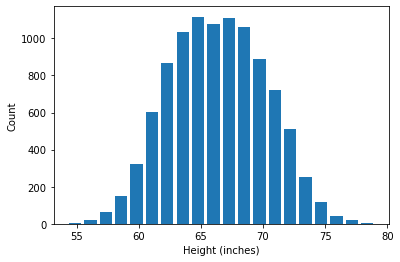

In [364]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

# Outlier detection and removal using 3 standard deviation

In [365]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714093

In [366]:
lower_limit = df.Height.mean() -3*df.Height.std()
lower_limit

54.82497539250156

In [367]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


78 inch which is around 6 ft 6 inch. Now that is quite unusual height. 
    
lower end it is 54 inch which is around 4 ft 6 inch.   

In [368]:
df_no_outlier = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# removal using Z Score

In [369]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [370]:
df[df['zscore']>3]


,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [371]:
df[df['zscore']<-3]


,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [372]:
df[(df.zscore<-3) | (df.zscore>3)]


,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [373]:
df_no_outlier = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outlier.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
